In [1]:
import numpy as np # Linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
47,27,54000,0
3,27,57000,0
223,60,102000,1
1,35,20000,0
189,28,32000,0


# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased',axis=1),
                                                   df['Purchased'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the scaler to the train set , it will learn parameters
scaler.fit(df.drop('Purchased',axis=1))
#scaler.fit(X_train)


# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
pd.DataFrame(X_test_scaled).describe()

,0,1
count,120.000000,120.000000
mean,-0.046642,-0.004429
std,1.060654,0.967094
min,-1.877311,-1.607506
25%,-0.922179,-0.667830
50%,-0.158074,-0.153945
75%,0.725422,0.506764
max,2.134241,2.356750


In [10]:
pd.DataFrame(X_test_scaled).describe()


,0,1
count,120.000000,120.000000
mean,-0.068394,-0.006231
std,1.088712,0.952412
min,-1.947491,-1.584970
25%,-0.967093,-0.659561
50%,-0.182774,-0.153478
75%,0.724094,0.497201
max,2.170181,2.319101


In [7]:
scaler.mean_

array([3.76550e+01, 6.97425e+04])

In [8]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [9]:
X_train_scaled
# Output was an numpy array

array([[-1.11320552, -1.60750566],
       [ 2.13424088,  0.94723686],
       [ 0.03295203,  1.24088543],
       [ 0.22397829,  1.09406114],
       [ 0.41500455, -0.49164111],
       [-0.25358736, -0.31545197],
       [ 0.98808332, -0.84401939],
       [ 0.98808332,  1.88691227],
       [ 0.03295203,  1.27025028],
       [-0.82666613,  2.29802026],
       [-1.11320552, -1.60750566],
       [ 2.13424088, -0.81465453],
       [-1.30423178, -1.49004624],
       [ 0.41500455,  2.32738512],
       [ 0.79705706,  0.77104772],
       [-0.92217926, -0.31545197],
       [ 0.12846516,  0.77104772],
       [-0.92217926,  0.56549373],
       [ 0.31949142,  0.06629116],
       [ 0.70154394, -1.28449224],
       [-0.44461362, -0.02180341],
       [-1.6862843 ,  0.35993973],
       [-0.63563988,  0.12502088],
       [ 0.41500455,  0.30121002],
       [-0.25358736,  0.06629116],
       [-0.44461362,  2.32738512],
       [ 0.22397829,  0.03692631],
       [ 1.27462271,  2.23929055],
       [ 0.79705706,

In [10]:
# Converting X_train_scaled (numpy array) to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [11]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [12]:
# Here's Scaling is done because we can see that mean is 0 now and S.D is 1.
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


# Effect of Scaling

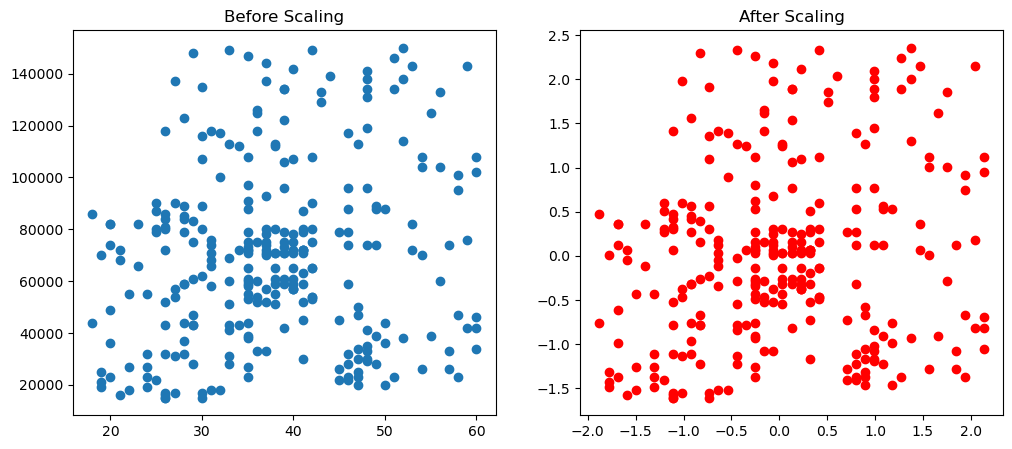

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

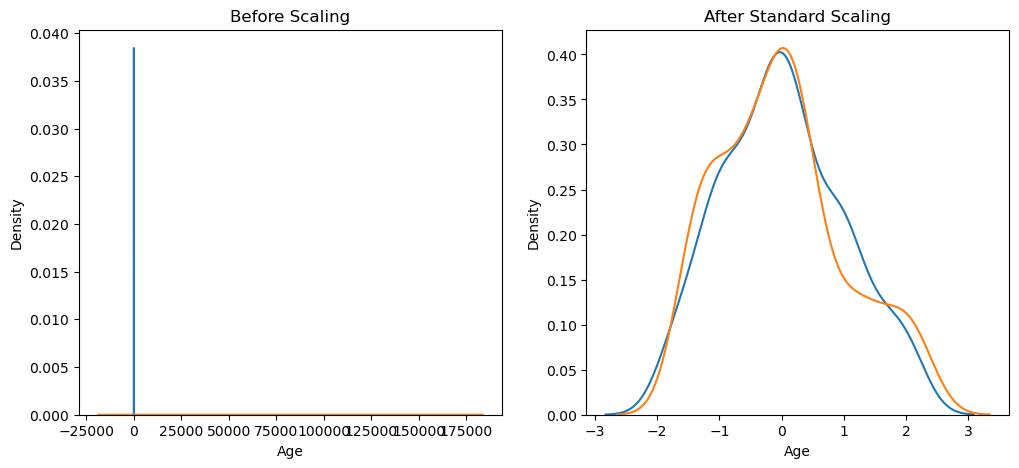

In [14]:
 fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
    
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

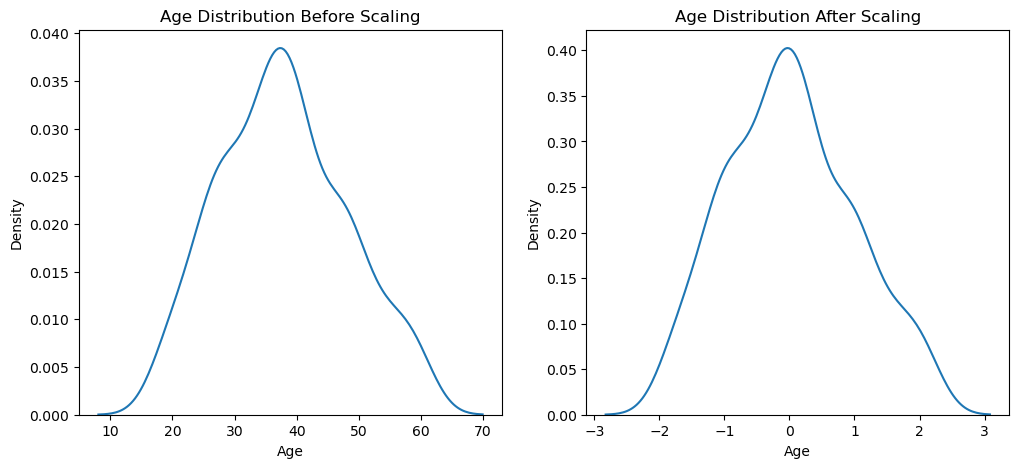

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax= ax1)

# After Scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax= ax2)
plt.show()

# Why scaling is important?

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [18]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [19]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score

In [23]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

In [ ]:
Y_pred = dt.predict(X_test)
Y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
print("Actual",accuracy_score(Y_test,Y_pred))
print("Scaled",accuracy_score(Y_test,Y_pred_scaled))

In [ ]:
df.describe()

# Effect of Outlier

In [13]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df

In [ ]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()